1. feladat: Készítsen programot, mely egy fényképezogép raw képei alapján megvilágítás-mérést ˝
végez.
A program tehát egy képet kap bemenetén és kiad egy számot arról, átlagosan hány lux megvilágítás érte az objektívet a kép alkotásakor. Ehhez az alábbiakat használhatja fel:

- a raw kép pixel-adatai: rawpy modul
- a kép EXIF adatai közül az ISO-érzékenység, az apertúra-méret (F-szám) és az expozíciós ido˝
(T): pyexiv2 modul (errol talál anyagot a Moodle-lapon) ˝ \

Kalibráláshoz felhasználhat mobil-telefon megvilágítás-méro alkalmazását. (Ez persze nem hi- ˝
teles értéket ad, de ha ezzel megy az eljárás, akkor a feladatot megoldotta és a mindennapokban jó
közelítést ad a módszer.)
A megoldáshoz szükséges, hogy 8–10 teszt esetben készítsen fénykép-luxmérés párokat és keressen olyan súlyfaktorokat a szenzor R, G és B komponenseihez, melyekkel azokat felszorozva és
összegezve, majd leosztva az (ISO · T)/F2 mennyiséggel, megkapja a lux-értéket.
(Az (ISO · T)/F2 mennyiséggel azért kell leosztani, hogy kompenzáljuk az eltéro objektív- ˝
fényero, ISO érzékenység és expozíciós id ˝ o hatását.) ˝
Ismertessen röviden egy potenciális alkalmazást ehhez a programhoz!

In [2]:
!pip install rawpy
!pip install pyexiv2

In [3]:
import rawpy
import pyexiv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# read raw images using rawpy
raw_image_path = '/content/drive/MyDrive/Raw_images/20241209_153144.dng'
with rawpy.imread(raw_image_path) as raw:
        raw_data = raw.raw_image_visible.astype(np.float32)

In [6]:
img = pyexiv2.Image(raw_image_path)
exif_data = img.read_exif_detail()

In [7]:
exposure_time = exif_data['Exif.Image.ExposureTime']
focal_length = exif_data['Exif.Image.FocalLength']
iso_data = exif_data['Exif.Image.ISOSpeedRatings']

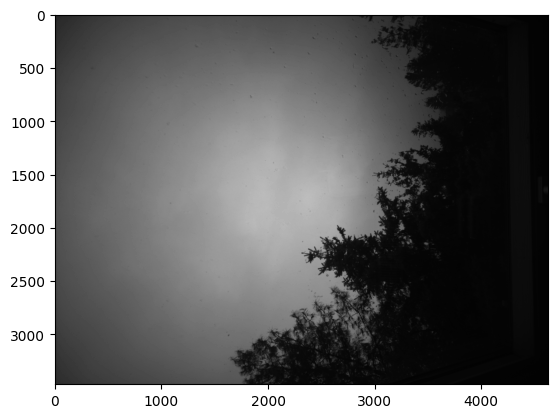

In [8]:
# show the image
plt.imshow(raw_data, cmap='gray')
plt.show()